<img style="float: left; padding-right: 10px; width: 45px" src="images/ExtensionFlag.jpg" alt="ExtensionFlag.jpg"/>

# CSCI-e89: Deep Learning, Fall 2024

## Lab 04- Convolutional Neural Networks (CNN)
**Harvard University Extension School - Prof. Zoran B. Djordjević**<br/>
**Joan Imrich  28-Sept-2024**<br/>
<hr style="height:2pt">

#### Part 1: CNN Core Concepts
* **Demo - How does CNN classify & predict images?**
* <i>Image recognition using CIFAR-10 data, Compare Sequential vs. DenseNet121 models, SGD Optimizer</i>

#### <font color="#9F0808">Part 2: SOTA CNNs & Hybrid Models</font>
* **Demo - DenseNet CNN**
* <i> Confusion Matrix, Data Aumentation, Validation </i>

### Table Of Contents: 

* [CNN CIFAR Challenges](#cifarcnn)
    * [Performance Metrics](#metrics)
    * [DenseNet CNN](#cnn)
* [Demo- Load Data & Preprocess](#data)
* [Demo- Build CNN (Sequential)](#buildcnn)
* [Demo- Data Augmentation](#augdata)
* [Demo- Build CNN (DenseNet)](#densecnn)
* [Demo- Model Evaluation](#cmatrix)
* [Appendix](#appendix) 


<hr/>

## <font color="#9F0808"> CNN CIFAR Challenges </font><a class="cifarcnn" id="cifarcnn"></a>

### Training a CNN on the CIFAR-10 dataset presents challenges: <img style="float: left; padding-left: 10px; height: 250px;" src="images/cifar_data.png" alt="cifar_data.png"/>

### Characteristics of CIFAR Dataset:
*  **CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images** 
* We have `10` classes, with three color channels (RGB), so if we pick a image and we randomly guess, **we have `1/10` probability to be true!**
* CIFAR images are **very small (`32x32`) and noisy**, by visualizing them you will notice how difficult it is to distinguish classification details even for a human
* Each image is labeled with one of the ten classes, **train and test images are highly overlapping in feature space, which can affect model generalization** (Overlapping Distributions, see plots below)
<hr/>

## <font color="#9F0808"> How well did the CNN model perform predictions?</font><a class="metrics" id="metrics"></a>

* **Accuracy = 77.57%** (not so good -- overfitting?)
* **F1 score = 78%** (is defined as the harmonic mean of precision and recall, deals with imbalanced classes)
* See output below for **accuracy: 0.7748 - loss: 0.6542 - precision: 0.8372 - recall: 0.7179**
* Not sure if regularization and data augmentation techniques helped increase accuracy
* Look at plot(s) below  "loss function evolution" shows overfitting. Think of loss as a scorecard that measures the difference between what the model predicted and the actual label of the image. The smaller the difference, the better the model is performing, so the goal is to reduce this gap as much as possible.

### Evaluating Metrics, Results, Confusion Matrix:

**Good Predictions for Trucks, Automobiles, Frogs** and **Not so good Predictions for Birds, Cats, Deer.** Performance and predictions on CIFAR-10 data can be improved by addressing challenges through design choices, experimentation with hyperparameters, optimizers, activation, CNN models.

#### 1. **Class Imbalance** <font color="#9F0808"> Yes.</font>
Although CIFAR-10 has an equal number of samples per class, variations in image quality or difficulty across classes can lead to perceived class imbalance during training. Some classes may be inherently more challenging for the model to learn, which can skew performance metrics and affect overall accuracy.

#### 2. **Data Augmentation** <font color="#9F0808"> Yes.</font>
To combat overfitting and improve generalization, data augmentation techniques are often employed. However, implementing effective augmentation strategies that enhance model robustness without introducing artifacts can be challenging. Common techniques include random cropping, rotation, and flipping, but finding the right combination requires experimentation.

####  3. **Overfitting** <font color="#9F0808"> Yes.</font>
Overfitting occurs when a model learns to perform exceptionally well on the training data but fails to generalize to unseen data. This is particularly problematic with CIFAR-10 due to the relatively small size of the images (32x32 pixels) and the limited number of training samples per class (6,000 images). A complex CNN model may capture noise in the training data rather than the underlying patterns, leading to poor performance on the test set.

####  4. **Underfitting** <font color="#9F0808"> No.</font>
Conversely, underfitting happens when a model is too simple to capture the underlying structure of the data. This can occur if the CNN lacks sufficient depth or complexity, resulting in low accuracy on both training and test datasets. Striking a balance between model complexity and capacity is crucial.

####  5. **Hyperparameter Tuning** <font color="#9F0808"> Reduce Epoch's!, ADAM vs SGD?</font>
Selecting appropriate hyperparameters (e.g., learning rate, batch size, number of epochs) is critical for successful training. The CIFAR-10 dataset's small image size means that even minor changes in hyperparameters can lead to significant differences in model performance. This tuning process can be time-consuming and computationally expensive.

#### 6. **Computational Resources** <font color="#9F0808"> Fine.</font>
Training deep CNNs requires substantial computational power, especially when experimenting with different architectures or hyperparameters. Limited access to GPUs or other hardware accelerators can hinder experimentation and slow down the training process.

#### 7. **Gradient Vanishing/Exploding** <font color="#9F0808"> Maybe?</font>
In deeper networks, gradients can either vanish or explode during backpropagation, making it difficult for the network to learn effectively. This is particularly relevant in CNNs where multiple layers are involved, necessitating careful initialization and architecture design to mitigate these issues.


## <font color="#9F0808"> Explore the power of **DenseNet CNN, a Sequential model structure** in Lab4 Demo(s)</font><a class="cnn" id="cnn"></a>

* **DenseNet (Densely Connected Convolutional Network) is a CNN** architecture that connects each layer to every other layer in a feed-forward fashion
* The dense connections allow each layer to receive inputs from all preceding layers, creating short paths from early layers to later layers.

<img style="float: right; padding-left: 10px; height: 250px;" src="images/densenet.jpg" alt="densenet.jpg"/>

**<font color="#9F0808"> DenseNet</font> is dense due to it's connectivity pattern:**

    Each layer receives inputs from all preceding layers within a dense block.
    This creates short paths for gradients to flow directly from later layers to earlier ones.

**The <font color="#9F0808"> Dense connections significantly enhance gradient flow</font> throughout the network:**

    Gradients can easily propagate from the output layers all the way back to the initial layers.
    This Improved Gradient Flow mitigates the vanishing gradient issue that often plagues very deep networks.

* **DenseNet** can be particularly useful for transfer learning and fine-tuning tasks
* **DenseNet transfer learning** enables pre-trained models to improve performance on new tasks with limited data
### Transfer Learning with DenseNet
Transfer learning involves using a model trained on one task as a starting point for a model on a second task. With DenseNet, this typically involves:

1. **Using pre-trained weights**: Start with a DenseNet model pre-trained on a large dataset like ImageNet.
2. **Freezing layers**: Keep the convolutional layers of the pre-trained DenseNet frozen, preserving the learned features
3. **Replacing the classifier**: Remove the top fully-connected layers and replace them with a new classifier tailored to the new task.
4. **Fine-tuning**: Optionally, fine-tune some of the later convolutional layers along with the new classifier on the target dataset.

### Benefits of DenseNet Transfer Learning
- **Improved performance**: Especially effective when working with small datasets, as it leverages features learned from a much larger dataset
- **Faster convergence**: The model starts with a good feature representation, allowing it to converge more quickly on the new task.
- **Versatility**: Can be applied to various computer vision tasks, including image classification, object detection, and medical image analysis

### Use Case Applications
**DenseNet transfer learning has been successfully applied in various domains**

- **Medical imaging**: Used for tasks like intracranial hemorrhage detection in CT scans and Alzheimer's disease classification in MRI images
- **Wildlife conservation**: Applied in projects like iWildCam for animal species identification in camera trap images
- **General image classification**: Effective for a wide range of image classification tasks, including fine-grained categories.

## <font color="#9F0808"> Demo - Load Data, Preprocessing, Distribution </font><a class="data" id="data"></a>

## Load CIFAR10 data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Confirm Balanced Output for Train & Test Data
# check the shape of CIFAR class labels
######################################
# X_train shape: (50000, 32, 32, 3)
# y_train shape: (50000, 1)
# X_test shape: (10000, 32, 32, 3)
# y_test shape: (10000, 1)


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


## Visualize Data (class distribution in training set)

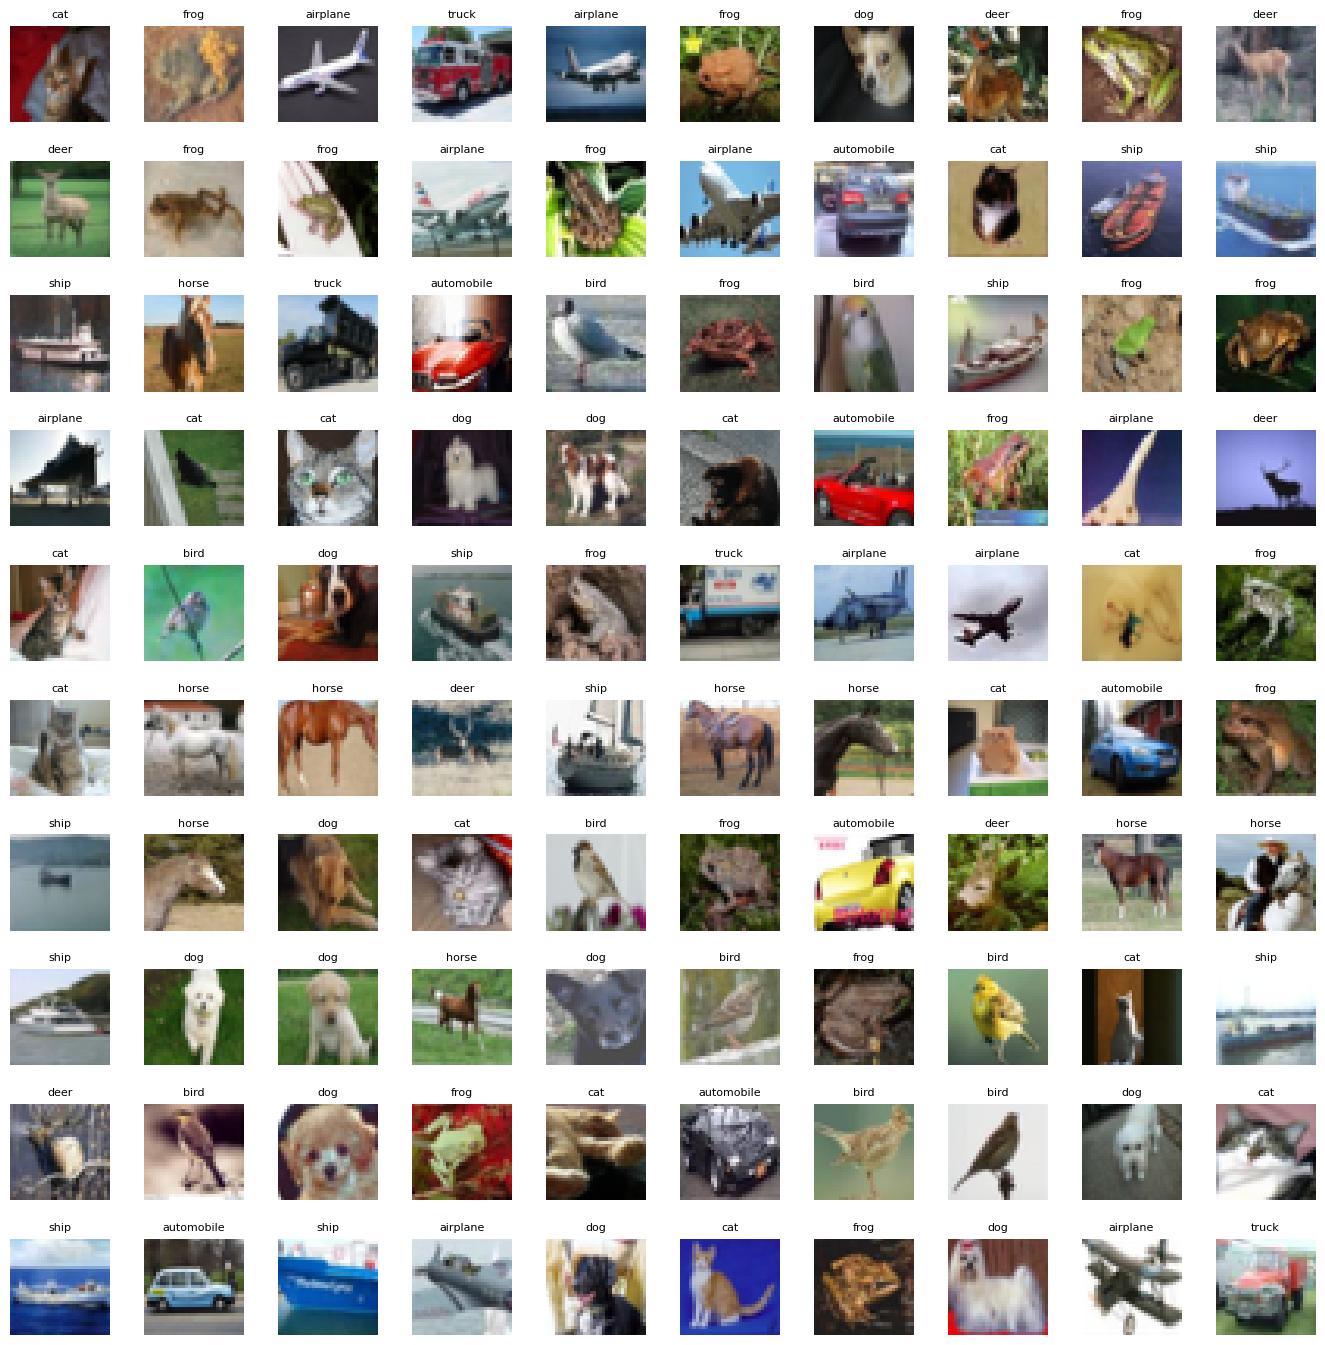

In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

* **Uniform distribution** ensures that each class is equally represented within the dataset, which is beneficial for training machine learning models as it prevents bias towards any particular category

* **Below we Confirm Train & Test Data** divided into 5,000 training images 1,000 test images.
* **Distribution of the CIFAR-10 dataset is as follows:**

    Total Images: 60,000 =
        Training Set: 50,000 images
       + Test Set: 10,000 images,
    (10 Classes: each with 6,000 images per class)


Text(0.5, 1.0, 'Class distribution in training set')

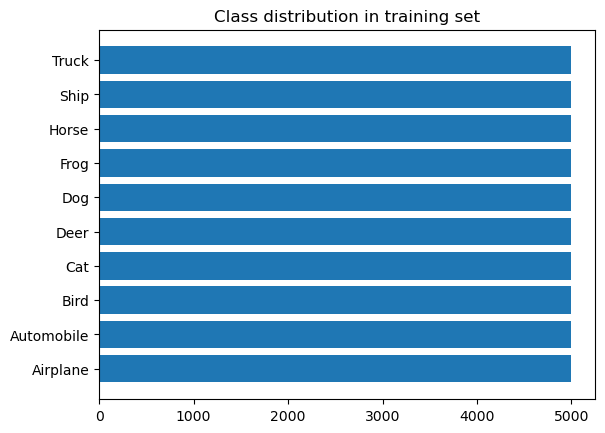

In [5]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

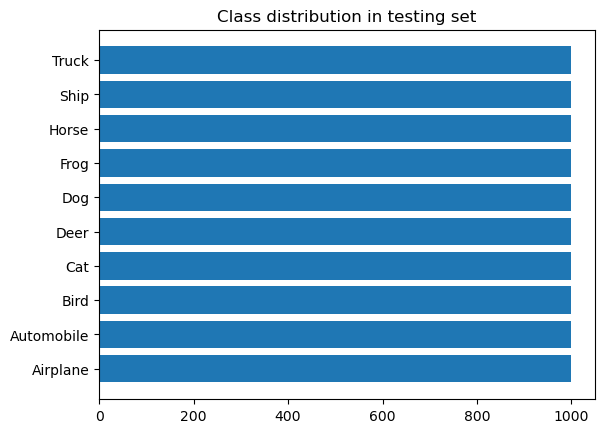

In [6]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

## Data Preprocessing

One-hot encoding is a method to convert categorical variables into a binary matrix representation. 
We Check the shape and a sample of the one-hot encoded labels to ensure correctness.

Use Keras' to_categorical function to convert the integer labels into one-hot encoded format.
Verify Each class label is converted into a vector where only one element is '1' (indicating the presence of that class) and all other elements are '0'. 

confirmed in cell above output shape:
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)

In [7]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

## <font color="#9F0808"> Build DenseNet CNN Model</font><a class="buildcnn" id="buildcnn"></a>

* **Sequential()**, Keras library in TensorFlow **from tensorflow.keras.models import Sequential**
Architecture consists of a linear stack of layers, making it easy to implement and understand. A stack of layers where each layer has exactly one input tensor and one output tensor
* **1st layer must define the input shape**, which allows Keras to infer the shapes of subsequent layers automatically.
* **Common Layer Types:**

        Conv2D: For convolutional layers that apply filters to input images.
        MaxPooling2D: For downsampling feature maps.
        Flatten: To convert 2D feature maps into 1D vectors before passing them to fully connected layers.
        Dense: For fully connected layers that typically serve as output layers with activation functions like Softmax for classification tasks

In [9]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

C:\ProgramData\anaconda_3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


##  <font color="#9F0808"> Why do Parameter Numbers Increase Below?</font>
CNNs usually reduce the spatial dimensions (width and height) of the feature maps as they progress through the network, often using pooling layers. To compensate for this reduction and maintain the network's capacity to learn, the number of filters (and thus parameters) is increased.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Early Stopping

Early stopping is a regularization technique **used to prevent overfitting** in neural networks. **It monitors a specified metric (e.g., validation loss) during training** and stops the process when the model's performance on the validation set starts to degrade.

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

## <font color="#9F0808"> Data Augmentation </font><a class="augdata" id="augdata"></a> is a powerful technique to increase training data diversity and size for CNNs
### By implementing data augmentation, you can significantly improve the performance and generalization of your CNN models, especially when working with limited datasets.

- Apply augmentation to the training set, and optionally to the validation set
- Choose augmentation techniques relevant to your specific problem and dataset
- For small datasets, consider using **transfer learning in combination with data augmentation**
- Monitor the model's performance to ensure augmentation is beneficial and not introducing unwanted biases

### Benefits of Data Augmentation for for CNN training:

- **Balanced classes**: For imbalanced datasets, augmentation can be used to generate additional samples for underrepresented classes
- **Increased dataset size**: It artificially expands the training set, providing more examples for the model to learn from
- **Improved generalization**: By exposing the model to various transformations of the input data, it helps prevent overfitting and makes the model more robust
- **Enhanced invariance**: It helps the CNN develop invariance to transformations like rotation, scaling, and flipping

### Common Data Augmentation Techniques

- Geometric transformations:
  - Flipping (horizontal/vertical)
  - Rotation
  - Scaling
  - Cropping
  - Translation

- Color space transformations:
  - Adjusting brightness
  - Changing contrast
  - Adding noise
  - Color jittering

#### TensorFlow and Keras provide built-in functions for data augmentation:

1. Using `tf.image` module:

```python
def augment(image):
    image = tf.image.random_crop(image, size=[224, 224, 3])
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    return image
```

2. Using `ImageDataGenerator`:

```python
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)
```

3. Using preprocessing layers:

```python
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomCrop(224, 224),
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.2),
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    # ... rest of the model
])
```



In [11]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=50,  ############ Can change value
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/50


C:\ProgramData\anaconda_3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 132s 81ms/step - accuracy: 0.3252 - loss: 1.9086 - precision: 0.4974 - recall: 0.1107 - val_accuracy: 0.4234 - val_loss: 1.6785 - val_precision: 0.6305 - val_recall: 0.2430
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:47 69ms/step - accuracy: 0.4688 - loss: 1.4501 - precision: 0.5714 - recall: 0.2500

C:\ProgramData\anaconda_3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4688 - loss: 0.7255 - precision: 0.5714 - recall: 0.2500 - val_accuracy: 0.4188 - val_loss: 1.7097 - val_precision: 0.6290 - val_recall: 0.2416
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 153s 98ms/step - accuracy: 0.5101 - loss: 1.3619 - precision: 0.6971 - recall: 0.3276 - val_accuracy: 0.6105 - val_loss: 1.1437 - val_precision: 0.7464 - val_recall: 0.4966
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4688 - loss: 0.6117 - precision: 0.7059 - recall: 0.3750 - val_accuracy: 0.6156 - val_loss: 1.1231 - val_precision: 0.7527 - val_recall: 0.4989
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 146s 93ms/step - accuracy: 0.6032 - loss: 1.1332 - precision: 0.7529 - recall: 0.4563 - val_accuracy: 0.6514 - val_loss: 1.0016 - val_precision: 0.7743 - val_recall: 0.5408
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6250 - loss: 0.5419 - precision: 0.8500 - recall: 0.5312 - val_accuracy: 0.6561 - val_los

## <font color="#9F0808"> DenseNet Model Evaluation</font><a class="cmatrix" id="cmatrix"></a> 

## How well did CNN model perform predictions? 
CNN model reported an accuracy of 77.57% (not so good -- overfitting?)

Look at plot(s) below  **"loss function evolution" shows overfitting.** Think of <font color="#9F0808"> loss as a scorecard that measures the difference between what the model predicted and the actual label of the image.</font> **The smaller the difference, the better the model is performing**, so the goal is to reduce this gap as much as possible. Common loss functions include:

- Mean Squared Error (MSE) for regression problems
- Cross-Entropy Loss for classification problems

Choice of metric depends on the specific problem and the consequences of different types of errors:

- Use accuracy for balanced datasets where all classes are equally important.
- Prioritize precision when false positives are costly.
- Focus on recall when false negatives are more critical.
- Consider the F1 score for a balanced view of precision and recall.

**F1 score = 78%  (is defined as the harmonic mean of precision and recall, deals with imbalanced classes)**
See output below for Accuracy, Loss, Prcision, Recall --> accuracy: 0.7748 - loss: 0.6542 - precision: 0.8372 - recall: 0.7179
Using regularization and data augmentation techniques we can increase accuracy.

## Accuracy

Accuracy measures the overall correctness of a model's predictions across all classes. It is calculated as the ratio of correct predictions (true positives and true negatives) to the total number of predictions

$$\text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}$$

While accuracy is intuitive, it can be misleading for imbalanced datasets where one class significantly outnumbers the others

## Precision

Precision measures the accuracy of positive predictions. It is the ratio of true positive predictions to the total number of positive predictions (true positives + false positives)

$$\text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}$$

Precision is particularly important when the cost of false positives is high. For example, in spam detection, high precision ensures that legitimate emails are not mistakenly classified as spam

## Recall

Recall, also known as sensitivity or true positive rate, measures the model's ability to identify all positive instances. It is calculated as the ratio of true positive predictions to the total number of actual positive instances[1].

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$

Recall is crucial when the cost of false negatives is high, such as in medical diagnosis or fraud detection.

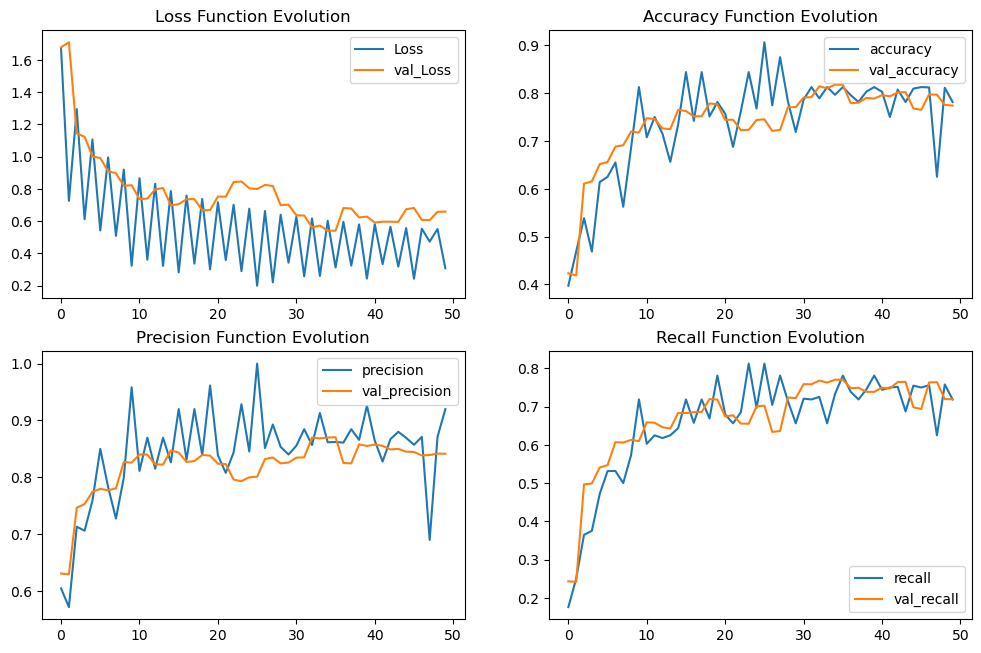

In [12]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.7748 - loss: 0.6542 - precision: 0.8372 - recall: 0.7179
Test Accuracy : 77.39%
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


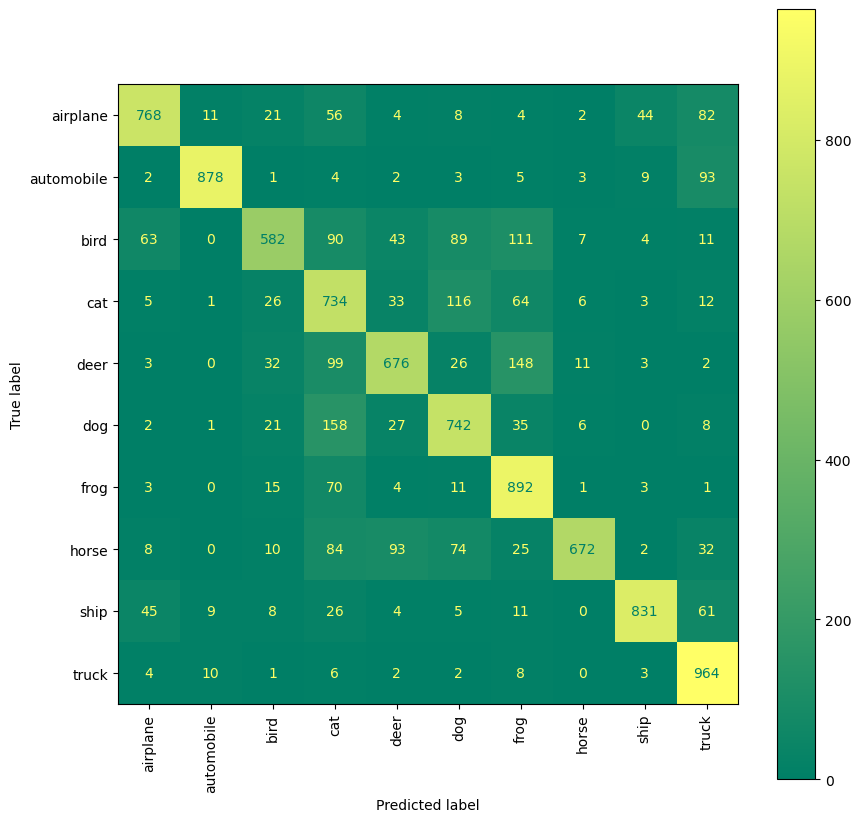

In [13]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

## <font color="#9F0808"> How well did the CNN model perform predictions?</font><a class="cmatrix" id="cmatrix"></a>

**Interpreting the Confusion Matrix:**
Rows represent the actual classes (true labels). Columns represent the predicted classes.

   <font color="#9F0808"> <b>The diagonal elements indicate correct predictions, while off-diagonal elements indicate misclassifications.</b>

<b>Good Predictions for Automobiles, Ships, Trucks, Airplanes </b>, Not so good Predictions for Cats, Birds, ... Animals
0=Airplane 81%,  1=Automoble= 92%, 2=Bird 68%, 3=Cat 63%, 4=Deer 72%, 5=Dog 71%, 6= Frog 77%, 7=Horse 79%, 8=Ship 87% 9=Truck 85% </font>
 
**TODO Try Experiments with Key Hyperparameters:**

    Learning Rate: This is one of the most impactful hyperparameters. Start with a small learning rate (e.g., 0.001) and experiment with learning rate schedules or adaptive learning rate methods (like Trying Adam Optimizer vs SGD).
    
    Batch Size: Common sizes range from 32 to 256. Smaller batch sizes can lead to better generalization, while larger sizes reduce training time but may lead to overfitting.
    Number of Epochs: Monitor performance across epochs to avoid overfitting. Implement early stopping based on validation loss.


**F1 score is defined as the harmonic mean of precision and recall (Formula)**
F1 score is particularly useful in scenarios where there is an imbalance in class distribution, as it provides a more informative measure than accuracy alone. The F1 score mitigates the imbalance risk by ensuring that both precision and recall are considered equally.

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1000
           1       0.96      0.88      0.92      1000
           2       0.81      0.58      0.68      1000
           3       0.55      0.73      0.63      1000
           4       0.76      0.68      0.72      1000
           5       0.69      0.74      0.71      1000
           6       0.68      0.89      0.77      1000
           7       0.95      0.67      0.79      1000
           8       0.92      0.83      0.87      1000
           9       0.76      0.96      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.79      0.77      0.78     10000
weighted avg       0.79      0.77      0.78     10000



## Test on one image

 Image 100 is [7]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
The model predict that image 100 is 7


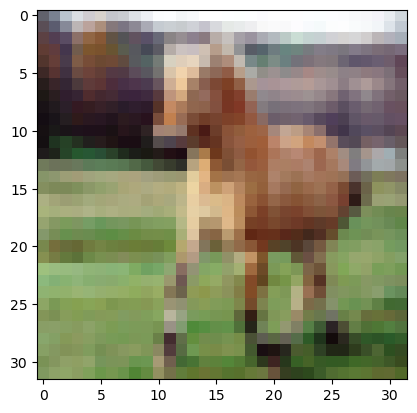

In [26]:
my_image = X_test[7379]# test image 100 is a deer that can be predicted accurately!!!
plt.imshow(my_image)

# that's a Horse
print(f" Image 100 is {y_test[7379]}")
####################################################################
# Model Correctly Predicted Class#7 Image #7379 as a Horse!
####################################################################
# "pred_100" variable stays same,  but change Input test image from from deer image#100 to horse image#7379
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 7379 is {pred_100}")
####################################################################
# Recall 10 CIFAR classes: 0=Airplane 1=Automoble 2=Bird 3=Cat 4=Deer 5=Dog 6= Frog 7=Horse 8=Ship 9=Truck
# Output below "The model predict that image 100 is 7" ... where 7 is the Horse classification
####################################################################

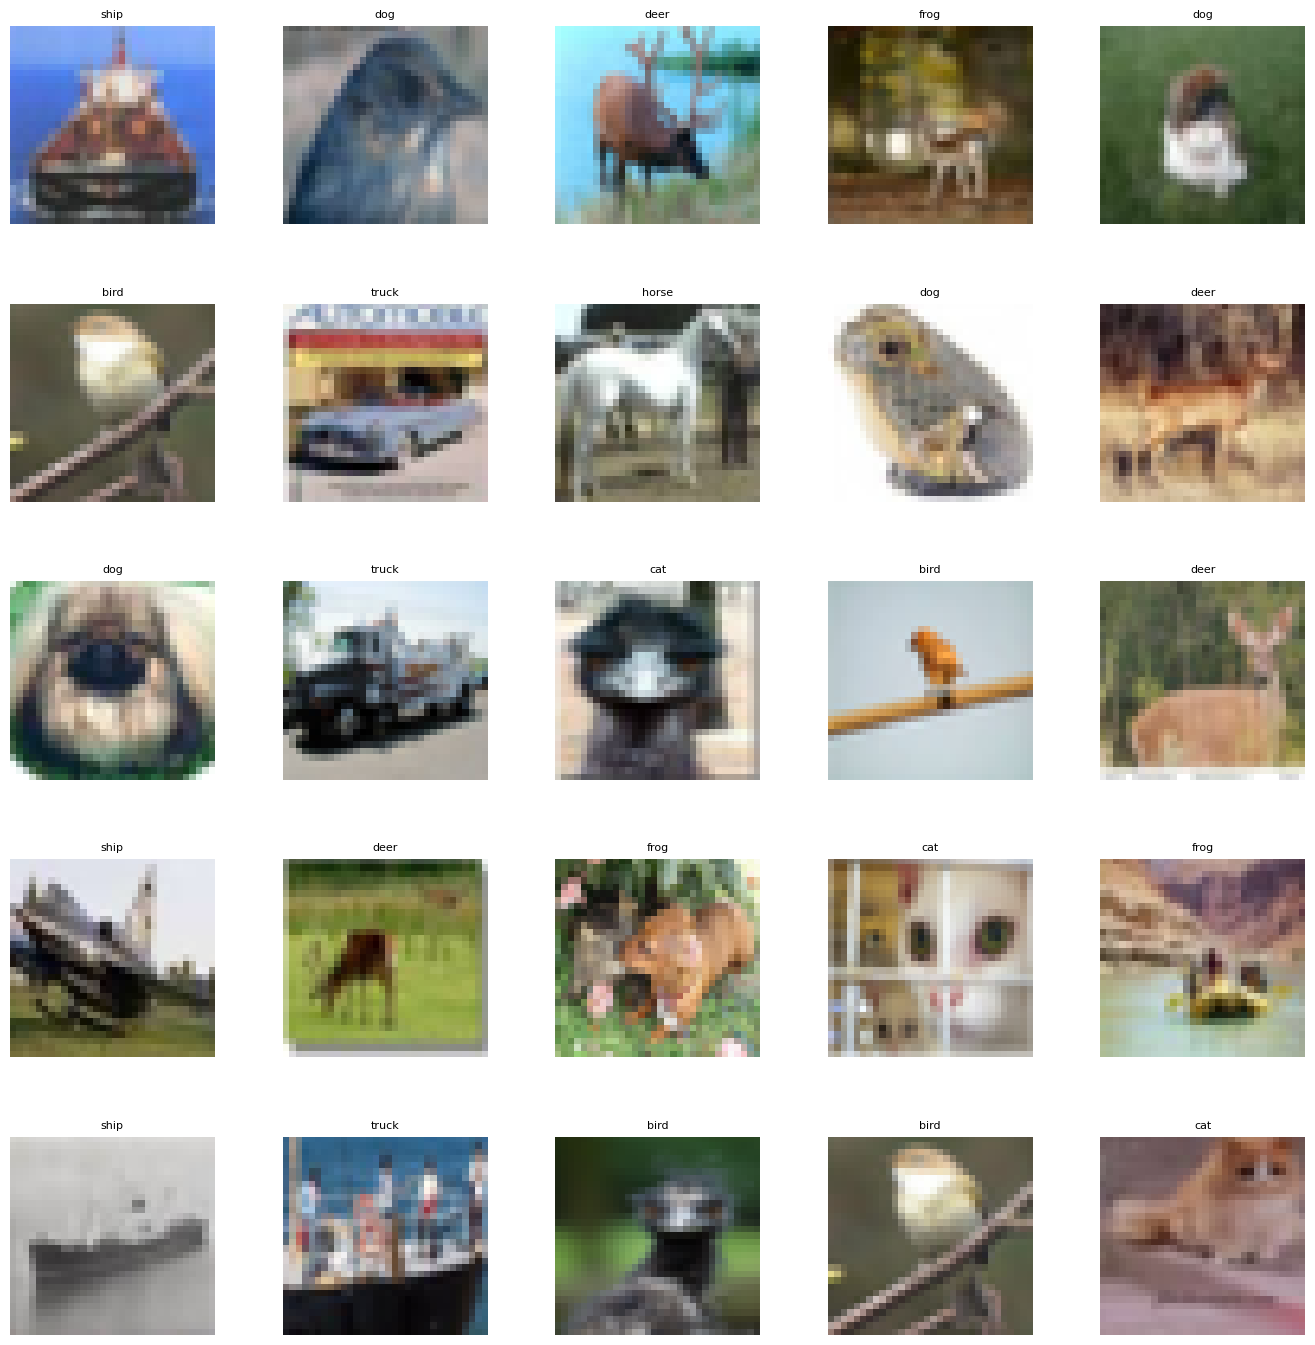

In [27]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
################################################################
## Can you find the 6 Sample Images Incorrectly Labeled Below?
# frog (row1, row4), cat (row3), ship (row4), truck (row5)
################################################################

In [28]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


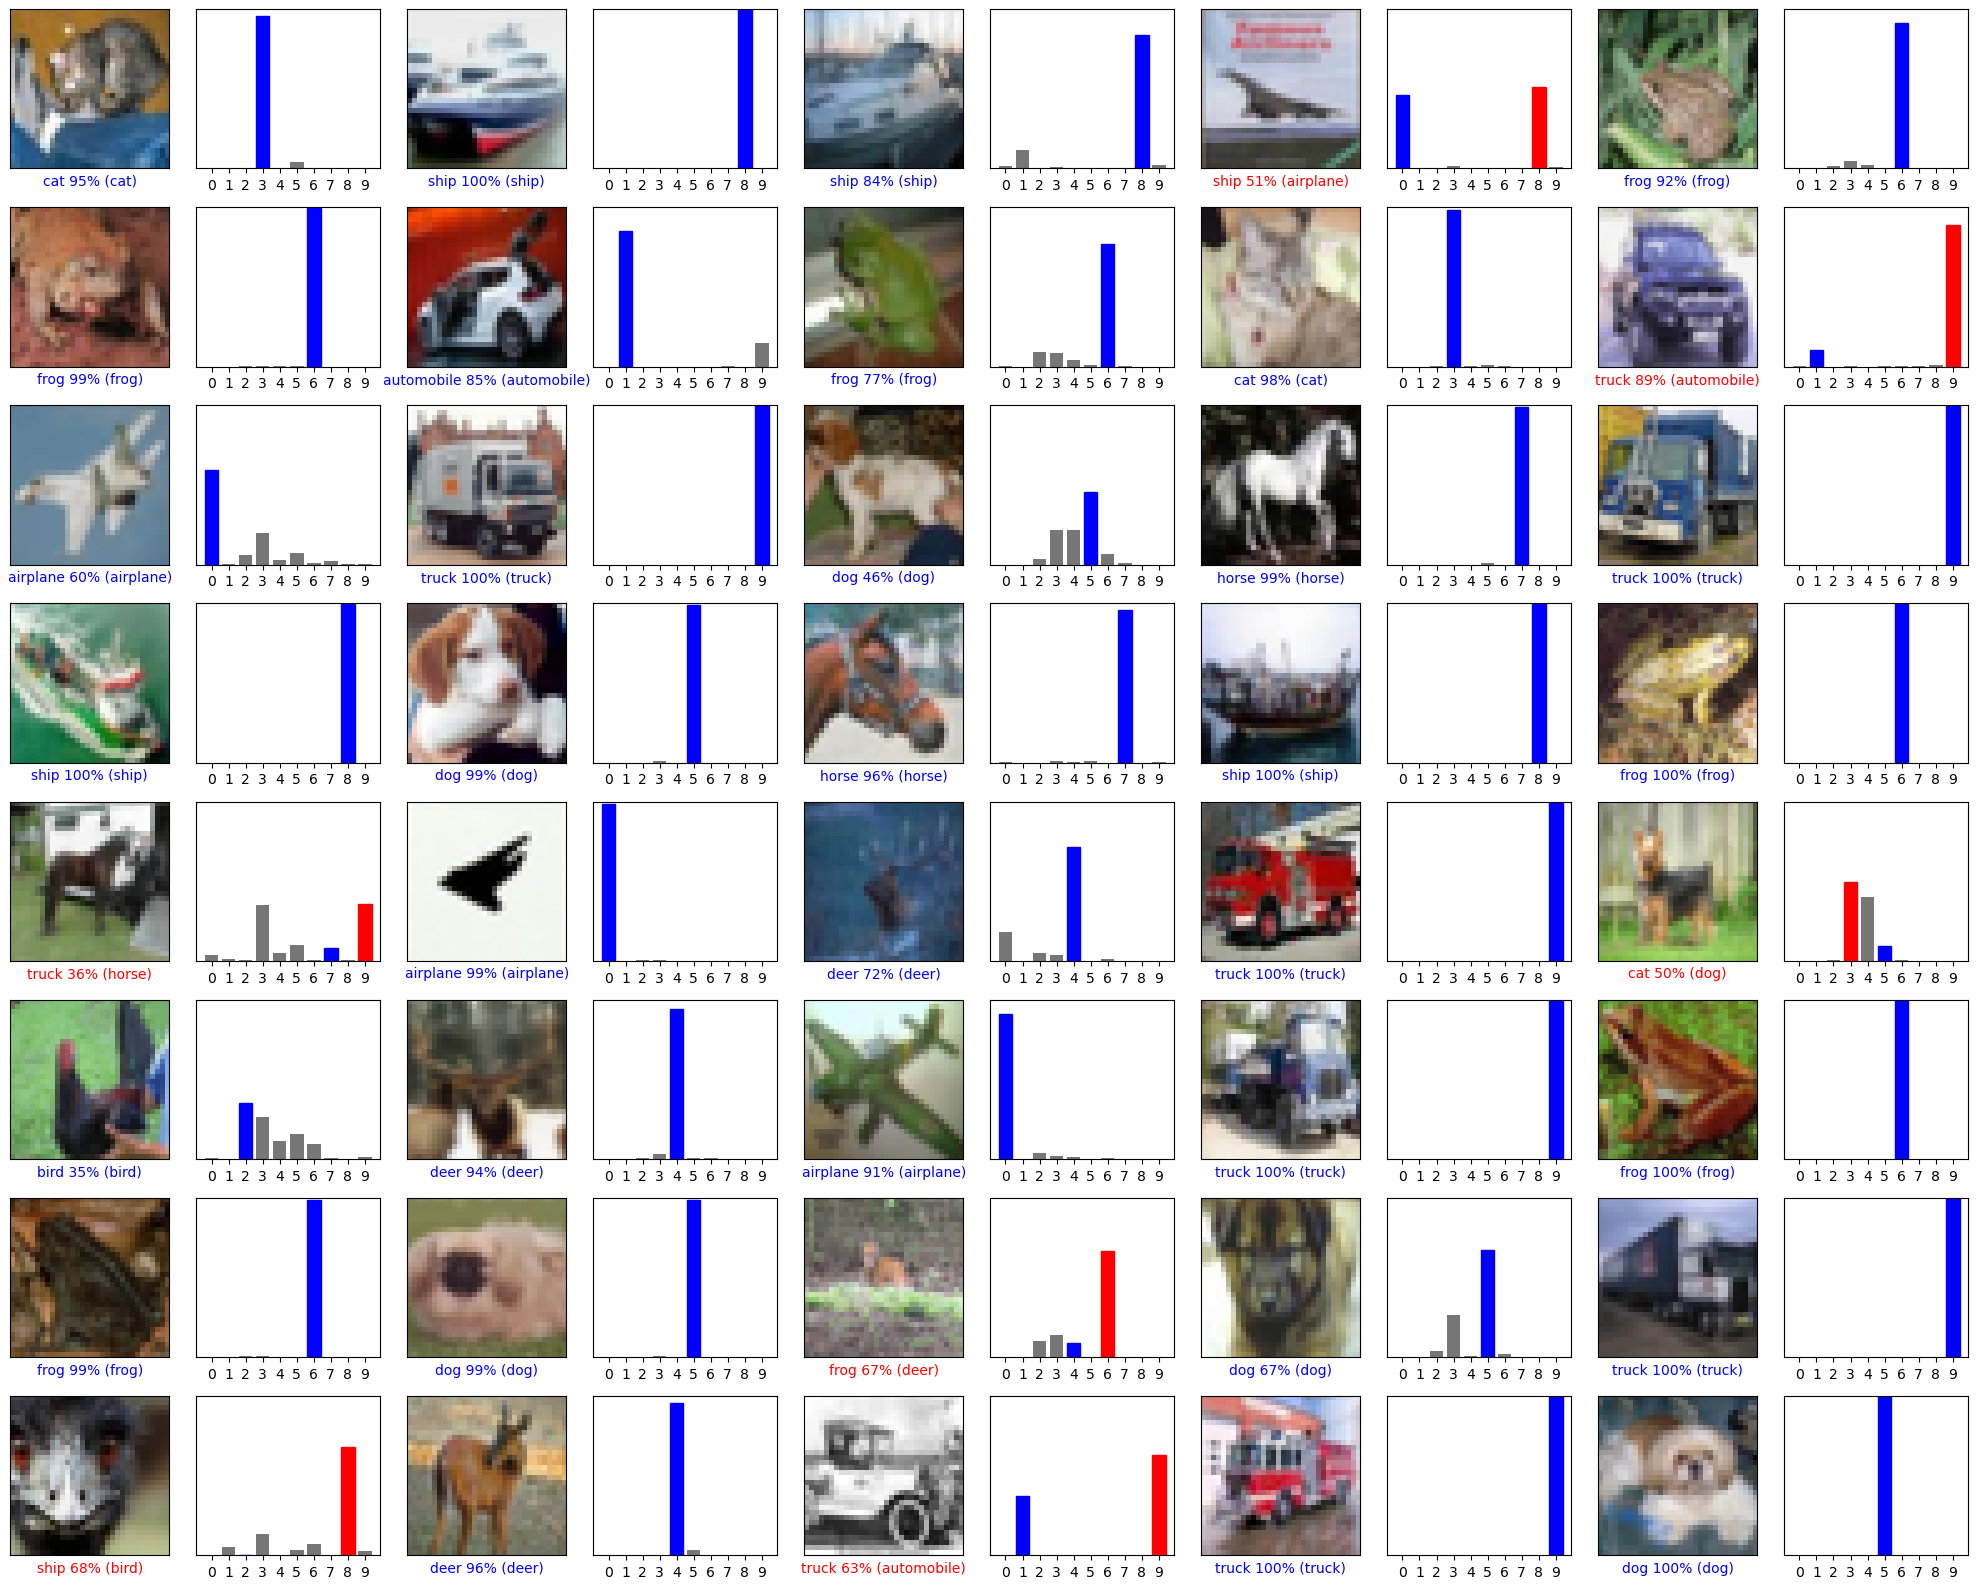

In [29]:
predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### Observe Above predicted labels VS the true labels (red plots)

## <font color="#9F0808"> Build DenseNet model to classify CIFAR data </font><a class="cmatrix" id="densecnn"></a>

In [30]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(train_generator, 
              epochs=100,  ###### Reduce to 20!!! (or 50 epochs ... 100 took > 10 hours)
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
             )

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 610s 344ms/step - accuracy: 0.4639 - loss: 1.6184 - val_accuracy: 0.1000 - val_loss: 196.8920
Epoch 2/100
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 8:13 316ms/step - accuracy: 0.3750 - loss: 1.6941

C:\ProgramData\anaconda_3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3750 - loss: 0.8476 - val_accuracy: 0.1000 - val_loss: 203.7026
Epoch 3/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 533s 341ms/step - accuracy: 0.4498 - loss: 1.5842 - val_accuracy: 0.3544 - val_loss: 6.3883
Epoch 4/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.5000 - loss: 0.8474 - val_accuracy: 0.3566 - val_loss: 5.8414
Epoch 5/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 520s 333ms/step - accuracy: 0.5163 - loss: 1.4233 - val_accuracy: 0.4445 - val_loss: 3.9687
Epoch 6/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7188 - loss: 0.4308 - val_accuracy: 0.4470 - val_loss: 3.8609
Epoch 7/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 527s 337ms/step - accuracy: 0.4063 - loss: 1.7049 - val_accuracy: 0.1166 - val_loss: 7.1764
Epoch 8/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.2500 - loss: 0.9320 - val_accuracy: 0.1154 - val_loss: 6.2976
Epoch 9/100
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 529s 339ms/step - accuracy: 0.

## <font color="#9F0808">APPENDIX </font><a class="appendix" id="appendix"></a>

## Process to Save CNN Models (Predict New Data)

In [32]:
from tensorflow.keras.models import load_model

#model.save('cnn_100_epochs.h5')
#model.save('cnn_model.h5', save_format='h5')
model.save('cnn_100epochs_model.keras')

#WARNING:You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. 
#This file format is considered legacy. We recommend using instead the native Keras format, 
#e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


When loading models, both formats (.h5 and .keras extensions) can be used with `keras.models.load_model()`, but .keras provides more complete model restoration.

The main differences between saving a Keras model with .h5 and .keras extensions are:

1. File format:
   - .h5: Uses the HDF5 file format
   - .keras: Uses a custom zip archive format introduced in Keras 3.0

2. Contents:
   - .h5: Typically saves just the model architecture and weights
   - .keras: Saves the full model, including architecture, weights, optimizer state, and training configuration[1]

3. Compatibility:
   - .h5: Older format, widely supported across TensorFlow/Keras versions
   - .keras: Newer format, requires Keras 3.0 or later

4. File size:
   - .keras: Generally produces smaller file sizes compared to .h5

5. Portability:
   - .keras: More portable as it contains full model information
   - .h5: May require additional code to recreate custom layers/objects

6. Loading:
   - .h5: May require specifying custom objects when loading
   - .keras: Can load the full model state without additional specifications[3]

7. Recommended usage:
   - .keras: Recommended for new projects using Keras 3.0+
   - .h5: Still supported for backwards compatibility

To save in .keras format:

```python
model.save('model.keras')
```

To save in .h5 format:

```python
model.save('model.h5', save_format='h5')
```




## <font color="#9F0808">Saving CNN Models (to Predict New Data)</font><a class="XAI" id="XAI"></a>

By following these steps, you can effectively use your saved CNN.h5 model for making predictions on new data

### <font color="#9F0808"></font>  To use a CNN model saved in the .h5 format, you can follow these steps:

## Loading the Model

First, you need to load the saved model:

```python
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('CNN.h5')
```

This loads the entire model architecture and weights into the `model` variable[3].

## Preparing Input Data

Before making predictions, ensure your input data is properly prepared:

1. Resize images to match the input shape expected by the model.
2. Normalize pixel values (typically to a range of 0-1).
3. Reshape the data to match the model's input shape, including the batch dimension.

For example:

```python
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess an image
img = image.load_img('test_image.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values
```

## Making Predictions

Now you can use the loaded model to make predictions:

```python
predictions = model.predict(img_array)
```

## Interpreting Results

The interpretation of the predictions depends on your model's output layer:

- For classification tasks with softmax output, you can get the predicted class:
  ```python
  predicted_class = np.argmax(predictions, axis=1)
  ```

- For regression tasks, the predictions are typically direct outputs.

## Additional Considerations

1. **Model Summary**: You can view the model architecture using `model.summary()`.

2. **Custom Objects**: If your model uses custom layers or loss functions, you need to provide them when loading:
   ```python
   model = load_model('CNN.h5', custom_objects={'CustomLayer': CustomLayer})
   ```
3. **GPU Usage**: The model will automatically use available GPUs if TensorFlow is configured correctly.

4. **Memory Management**: For large models, consider using `model.predict()` in batches to manage memory usage.


### <font color="#9F0808"></font>How to interpret NN model accuracy and predictions?
A defining feature of successful NN modeling is: Can it predict what will happen?
To load a saved CNN model in Keras, you can follow these steps:
1. Import the necessary module:
```python
from tensorflow.keras.models import load_model
```
2. Load the saved model:
```python
model = load_model('path/to/your/model.h5')
```
This will load the entire model architecture and weights into the `model` variable[1][2].
Once loaded, you can use the model for making predictions:

```python
predictions = model.predict(input_data)
```

#### Other things to consider:

1. Ensure your input data matches the expected shape of the model. You may need to preprocess your data:

```python
import numpy as np
from tensorflow.keras.preprocessing import image

img = image.load_img('test_image.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize pixel values
```
2. If your model uses custom layers or loss functions, you need to provide them when loading:

```python
model = load_model('model.h5', custom_objects={'CustomLayer': CustomLayer})
```

3. You can check the model's architecture after loading:

```python
model.summary()
```
4. If you only saved the model weights, you'll need to recreate the model architecture before loading the weights:

```python
model = create_model()  # Function to recreate your model architecture
model.load_weights('model_weights.h5')
```
